In [271]:
import numpy as np
import pandas as pd


In [272]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()
# df.shape
# 1-> customer lest the bank ; 0-> customer is still there



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [273]:
# To check if there is a missing value
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [274]:
# Check for duplicated rows
df.duplicated().sum()

0

In [275]:
# Check no. of customers in each class
df['Exited'].value_counts()
# Class imbalance problem

Exited
0    7963
1    2037
Name: count, dtype: int64

In [276]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [277]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [278]:
#Drop  Columns-> Rownumber,Surname , CustomerId
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [279]:
#One Hot Encoding on the Categorical Columns -> convert String into Vectors
df=pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True,dtype=int)

In [280]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [281]:
x_train.shape

(8000, 11)

In [282]:
#Applying Scaling , because the range of numbers is high
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [283]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# '''| Method            | What it Does                                                            | When to Use                      |
# | ----------------- | ----------------------------------------------------------------------- | -------------------------------- |
# | `fit_transform()` | Learns the scaling parameters **(mean, std)** from data and applies it. | Use it on your **training data** |
# | `transform()`     | Just **applies** the learned parameters (from training) to new data.    | Use it on **test or new data**   |
# '''

In [284]:
x_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [285]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input ,Dense # Dense->  fully connected layer — every neuron (node) in this layer is connected to every neuron in the next layer.

In [286]:
# import tensorflow as tf
# print(tf.keras.__version__)


In [287]:
# model=Sequential()

# model.add(Dense(3,activation='sigmoid',input_dim=11)) #input_dim- no.of features in the data
# model.add(Dense(1,activation='sigmoid'))

In [288]:

# model = Sequential()
# model.add(Input(shape=(11,)))  # input layer
# model.add(Dense(3, activation='sigmoid'))  # hidden layer
# model.add(Dense(1, activation='sigmoid'))  # output layer


In [289]:
# # Get model summary
# model.summary()

In [290]:
# # Model compilation

# model.compile(loss='binary_crossentropy',optimizer='Adam')
# #Model training - all the wights and bias will be calculated
# history = model.fit(x_train_scaled,y_train,epochs=10)

In [291]:
# #Get all the wights at layer 0 
# model.layers[0].get_weights()

In [292]:
# #Get all the wights at layer 1
# model.layers[1].get_weights()

In [293]:
# #Prediction
# y_log=model.predict(x_test_scaled)
# # output is not exactly 1 or 0 because using sigmoid , we will have 0-1 probability

In [294]:
# # Convert output in 0 or 1 , using 
# y_predict=np.where(y_log>0.5,1.0,0.0) # if y_log>0.5 then output is 1 else 0


In [295]:
# # Accuracy of the model
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_predict)

# import matplotlib.pyplot as plt 
# plt.plot (history.history['loss'])


In [296]:
# How to increse the accuracy ;
# Increase epoch to 1000
# Use Relu in the hiddne layer
#Increase the no. of nodes in the hidden layer
# Increase hidden layer (but if it is too high then it mat cause Overfitting)

In [297]:

model = Sequential()
model.add(Input(shape=(11,)))  # input layer
model.add(Dense(11, activation='relu'))  # hidden layer
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # output layer


In [298]:
# Get model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [299]:
# Model compilation

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#Model training - all the wights and bias will be calculated
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7129 - loss: 0.5966 - val_accuracy: 0.7969 - val_loss: 0.4771
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8003 - loss: 0.4609 - val_accuracy: 0.8044 - val_loss: 0.4419
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8045 - loss: 0.4365 - val_accuracy: 0.8131 - val_loss: 0.4272
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8096 - loss: 0.4262 - val_accuracy: 0.8175 - val_loss: 0.4146
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.8340 - loss: 0.3955 - val_accuracy: 0.8256 - val_loss: 0.4035
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8377 - loss: 0.3895 - val_accuracy: 0.8319 - val_loss: 0.3922
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.8417 - loss: 0.3781 - val_accuracy: 0.8413 - val_loss: 0.3827
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.8489 - loss: 0.3649 

In [300]:
#Prediction
y_log=model.predict(x_test_scaled)
# output is not exactly 1 or 0 because using sigmoid , we will have 0-1 probability
# Convert output in 0 or 1 , using 
y_predict=np.where(y_log>0.5,1.0,0.0) # if y_log>0.5 then output is 1 else 0


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [301]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.854

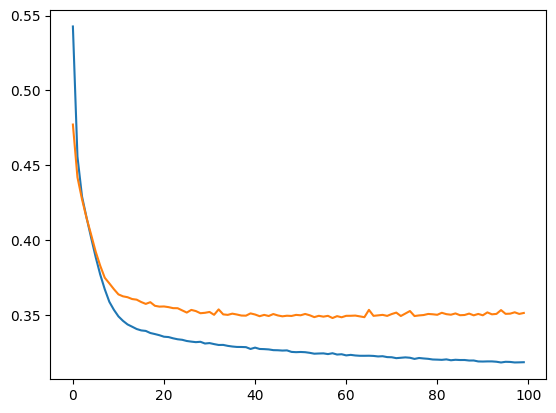

In [302]:
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])


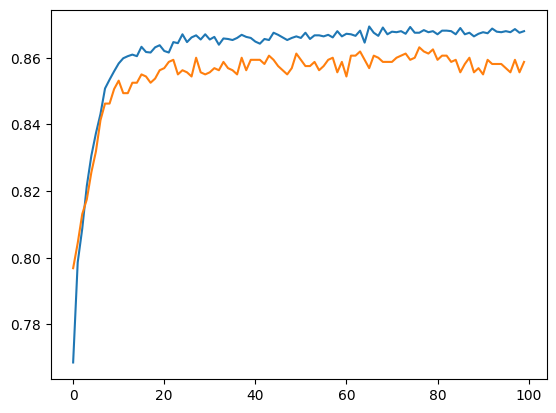

In [304]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])